<a href="https://colab.research.google.com/github/Yuito-K/risawa/blob/main/decisiontree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木を用いたIrisデータセットの分類と可視化

## 環境設定とデータ準備：

In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Irisデータセットの読み込み
iris = load_iris()
X, y = iris.data, iris.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 決定木モデルの構築と評価：

In [104]:
# モデルの構築
model= DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 決定木の可視化：

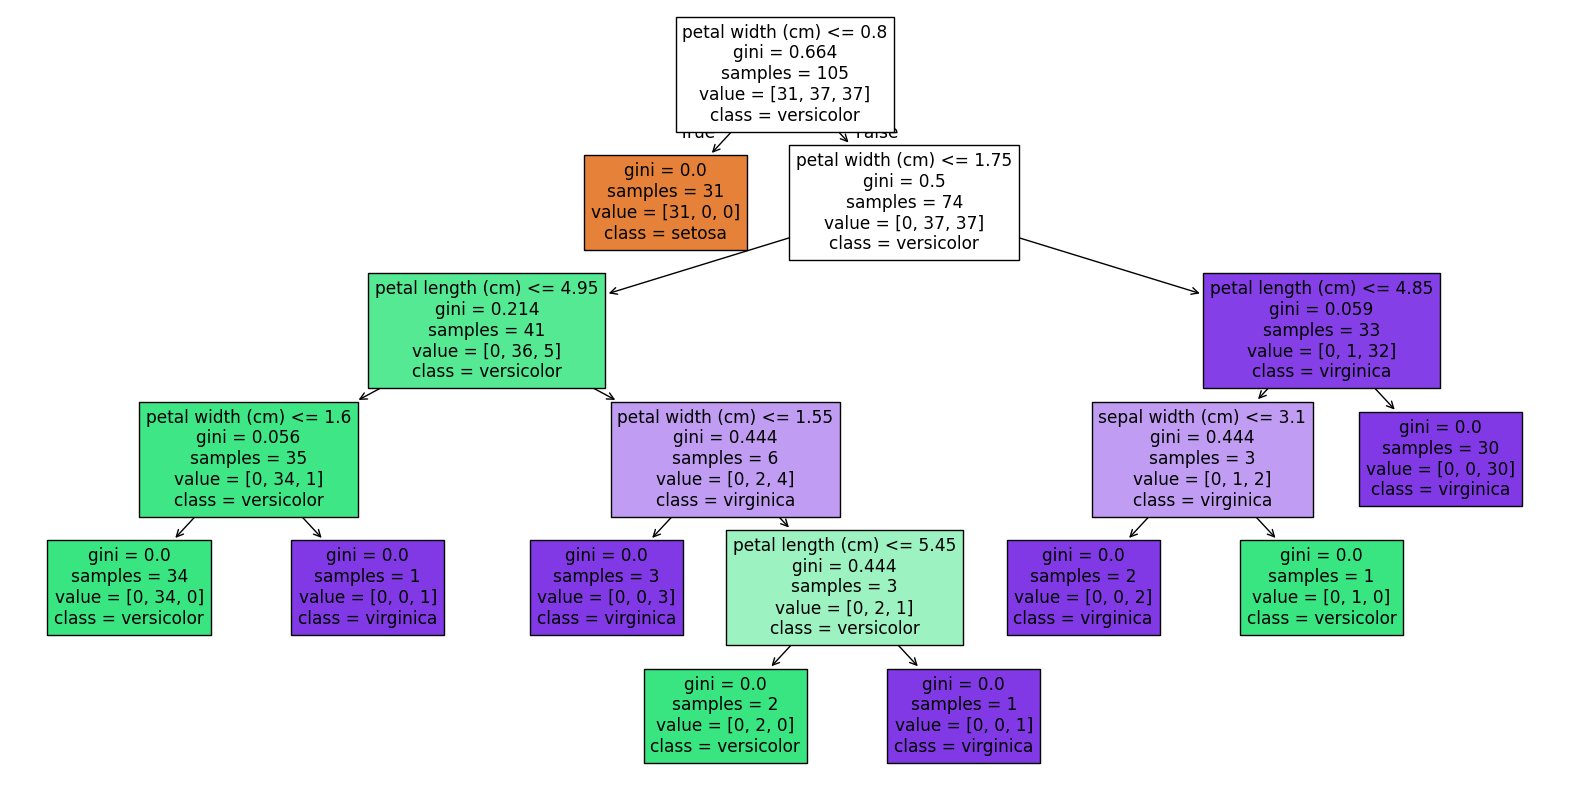

In [105]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.show()

## 特徴量の重要度：

In [106]:
# 特徴重要度の取得
feature_importances = model.feature_importances_

# 特徴量重要度の表示
for feature_name, importance in zip(iris.feature_names, feature_importances):
    print(f"{feature_name}: {importance:.4f}")

sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.0876
petal width (cm): 0.8933


## 決定木の深さによる性能変化：
モデル定義時の `max_depth` の値を変化させながら，学習・評価を繰り返す。

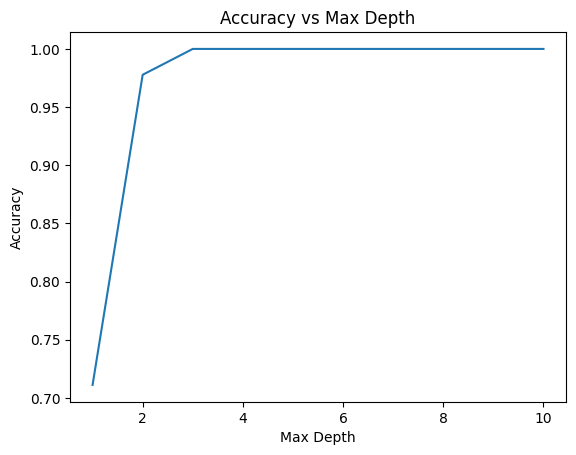

In [107]:
max_depths = range(1, 11)
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

In [108]:
# prompt: scikit-learnの datasets モジュールを用いてBreast Cancer Wisconsinデータセットを読み込みます。

from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# データセットに関する情報を表示 (任意)
print("特徴量の名前:", breast_cancer.feature_names)
print("ターゲットの名前:", breast_cancer.target_names)
print("データセットの形状:", X.shape)

特徴量の名前: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
ターゲットの名前: ['malignant' 'benign']
データセットの形状: (569, 30)


In [109]:
# prompt: 特徴量の名称を確認してください。このデータセットは 30次元（30個の特徴量）があります。

print("特徴量の名称:", breast_cancer.feature_names)

特徴量の名称: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [110]:
# prompt: データの基本的な統計情報を確認

import pandas as pd

# 特徴量の名称とデータを組み合わせたDataFrameを作成
df = pd.DataFrame(X, columns=breast_cancer.feature_names)

# ターゲットを追加
df['target'] = y

# データの基本的な統計情報を確認
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [111]:
# prompt: データセットを学習データとテストデータに分割します（例：80%を訓練データ，20%をテストデータ）

# データの分割 (80%を訓練データ、20%をテストデータ)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"訓練データの形状: {X_train.shape}")
print(f"テストデータの形状: {X_test.shape}")
print(f"訓練データのターゲット形状: {y_train.shape}")
print(f"テストデータのターゲット形状: {y_test.shape}")


訓練データの形状: (455, 30)
テストデータの形状: (114, 30)
訓練データのターゲット形状: (455,)
テストデータのターゲット形状: (114,)


In [112]:
# prompt: scikit-learnの DecisionTreeClassifier を用いて決定木分類器を実装します。ここでは max_depth を指定しないでください（＝デフォルト値である「無制限」を指定する）

# DecisionTreeClassifierのインスタンス化（max_depthなし）
model_no_limit = DecisionTreeClassifier(random_state=42)

# モデルの訓練
model_no_limit.fit(X_train, y_train)

# テストデータでの予測
y_pred_no_limit = model_no_limit.predict(X_test)

# 評価
print("Accuracy (no max_depth):", accuracy_score(y_test, y_pred_no_limit))
print("\nClassification Report (no max_depth):\n", classification_report(y_test, y_pred_no_limit))

# 決定木の深さを確認（参考）
print("\nDepth of the tree (no max_depth):", model_no_limit.get_depth())

Accuracy (no max_depth): 0.9473684210526315

Classification Report (no max_depth):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Depth of the tree (no max_depth): 7


In [113]:
# prompt: 訓練データを用いてモデルを訓練します

# max_depthを指定したDecisionTreeClassifierのインスタンス化
# 例としてmax_depth=5を使用
model_with_limit = DecisionTreeClassifier(max_depth=5, random_state=42)

# モデルの訓練
model_with_limit.fit(X_train, y_train)

# テストデータでの予測
y_pred_with_limit = model_with_limit.predict(X_test)

# 評価
print("Accuracy (max_depth=5):", accuracy_score(y_test, y_pred_with_limit))
print("\nClassification Report (max_depth=5):\n", classification_report(y_test, y_pred_with_limit))

# 決定木の深さを確認（参考）
print("\nDepth of the tree (max_depth=5):", model_with_limit.get_depth())

Accuracy (max_depth=5): 0.9473684210526315

Classification Report (max_depth=5):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Depth of the tree (max_depth=5): 5


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

# Breast Cancerデータセットの読み込み
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木分類器の訓練
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# 評価指標の計算と表示
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"正解率 (Accuracy): {accuracy:.4f}")
print(f"適合率 (Precision): {precision:.4f}")
print(f"再現率 (Recall): {recall:.4f}")
print(f"F1スコア (F1 Score): {f1:.4f}")

正解率 (Accuracy): 0.9474
適合率 (Precision): 0.9577
再現率 (Recall): 0.9577
F1スコア (F1 Score): 0.9577


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

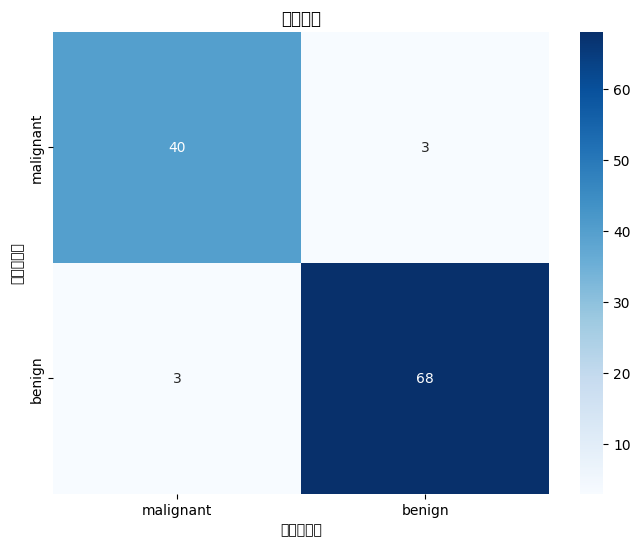

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 混同行列の計算
cm = confusion_matrix(y_test, y_pred)

# 混同行列の可視化
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('予測ラベル')
plt.ylabel('真のラベル')
plt.title('混同行列')
plt.show()

max_depth: 1, 正解率: 0.8947
max_depth: 3, 正解率: 0.9474
max_depth: 5, 正解率: 0.9474
max_depth: 7, 正解率: 0.9474
max_depth: 10, 正解率: 0.9474
max_depth: 15, 正解率: 0.9474
max_depth: 20, 正解率: 0.9474
max_depth: 50, 正解率: 0.9474


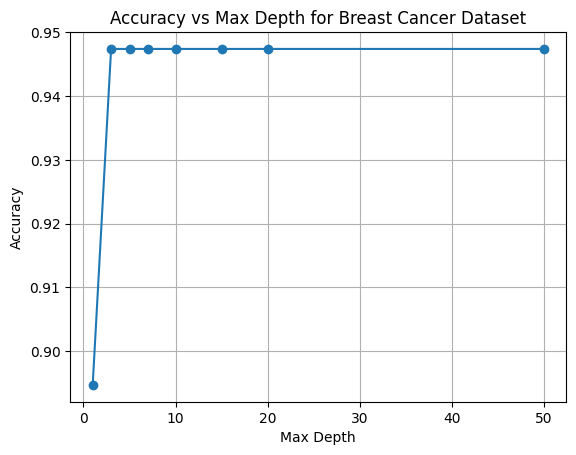

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Breast Cancerデータセットの読み込み
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 評価する max_depth のリスト
max_depths = [1, 3, 5, 7, 10, 15, 20, 50]
accuracies = {}

for depth in max_depths:
    # 決定木分類器のインスタンス化
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # モデルの訓練
    model.fit(X_train, y_train)

    # テストデータでの予測
    y_pred = model.predict(X_test)

    # 正解率の計算と保存
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[depth] = accuracy
    print(f"max_depth: {depth}, 正解率: {accuracy:.4f}")

# 結果をグラフで表示することも可能です
import matplotlib.pyplot as plt

plt.plot(accuracies.keys(), accuracies.values(), marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Breast Cancer Dataset')
plt.grid(True)
plt.show()

結果の分析
max_depth の値が小さいと、モデルが単純になり、学習データにフィットしきれずに性能が低い（アンダーフィッティング）。
max_depth の値を大きくしていくと、モデルはより複雑になり、性能は向上する。
しかし、max_depth が大きすぎると、モデルが訓練データに過度に適合し、未知のデータに対する汎化性能が低下する可能性がある（オーバーフィッティング）。
したがって、性能が最も高くなる max_depth を見つけることが重要。


max_depth: 1, 訓練データ正解率: 0.9209, テストデータ正解率: 0.8947
max_depth: 3, 訓練データ正解率: 0.9780, テストデータ正解率: 0.9474
max_depth: 5, 訓練データ正解率: 0.9956, テストデータ正解率: 0.9474
max_depth: 7, 訓練データ正解率: 1.0000, テストデータ正解率: 0.9474
max_depth: 10, 訓練データ正解率: 1.0000, テストデータ正解率: 0.9474
max_depth: 15, 訓練データ正解率: 1.0000, テストデータ正解率: 0.9474
max_depth: 20, 訓練データ正解率: 1.0000, テストデータ正解率: 0.9474
max_depth: 50, 訓練データ正解率: 1.0000, テストデータ正解率: 0.9474


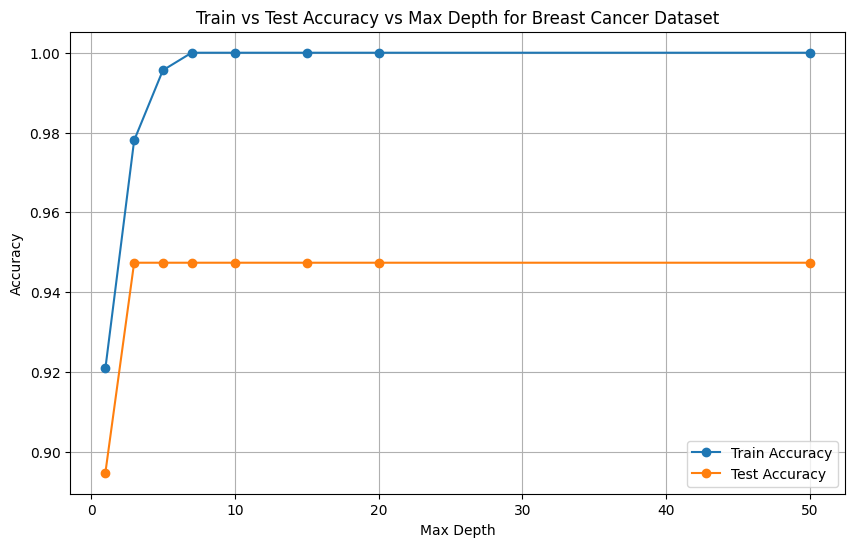

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Breast Cancerデータセットの読み込み
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 評価する max_depth のリスト
max_depths = [1, 3, 5, 7, 10, 15, 20, 50]
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    # 決定木分類器のインスタンス化
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # モデルの訓練
    model.fit(X_train, y_train)

    # 訓練データでの予測と正解率
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # テストデータでの予測と正解率
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    print(f"max_depth: {depth}, 訓練データ正解率: {train_accuracy:.4f}, テストデータ正解率: {test_accuracy:.4f}")

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(max_depths, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy vs Max Depth for Breast Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()


過学習に関する考察
グラフを見ると、max_depthが小さい間は訓練データとテストデータ両方の正解率が低い状態（アンダーフィッティング）になっている。max_depthが大きくなるにつれて、訓練データの正解率は上昇し続けていて、これはモデルが訓練データに適合していくことを示していると思われる。
一方、テストデータの正解率はある程度まで上昇した後、max_depthをさらに大きくしても頭打ちになったり、場合によっては低下したりする傾向が見られた。訓練データの正解率とテストデータの正解率の間に乖離が見られるようになった場合、特に訓練データの正解率が非常に高く、テストデータの正解率がそれほど高くない、または低下している場合は、モデルが訓練データに過学習していると考えられる。
過学習は、モデルが訓練データのノイズや特殊なパターンまで学習してしまい、未知のデータに対する汎化性能が低下する現象で、このプロットから、訓練データの正解率とテストデータの正解率の差が大きくなるポイントを探すことで、過学習が始まりやすいmax_depthの範囲を推測することができる。最適なmax_depthは、テストデータの正解率が最も高くなる、あるいは訓練データとテストデータの正解率の差が小さい範囲で選ぶことが望ましいと考えた。

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Breast Cancerデータセットの読み込み
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 最適とされた max_depth で決定木分類器のインスタンス化
# ここでは例として max_depth=5 を使用します
optimal_max_depth = 5
model = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)

# モデルの訓練
model.fit(X_train, y_train)

# 特徴量の重要度を取得
feature_importances = model.feature_importances_

# 特徴量の重要度を表示
print(f"Decision Tree Model with max_depth={optimal_max_depth}")
print("Feature Importances:")
for feature_name, importance in zip(breast_cancer.feature_names, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


Decision Tree Model with max_depth=5
Feature Importances:
mean radius: 0.0000
mean texture: 0.0314
mean perimeter: 0.0000
mean area: 0.0000
mean smoothness: 0.0000
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: 0.7037
mean symmetry: 0.0000
mean fractal dimension: 0.0000
radius error: 0.0000
texture error: 0.0064
perimeter error: 0.0000
area error: 0.0122
smoothness error: 0.0013
compactness error: 0.0000
concavity error: 0.0000
concave points error: 0.0162
symmetry error: 0.0000
fractal dimension error: 0.0189
worst radius: 0.0532
worst texture: 0.0282
worst perimeter: 0.0524
worst area: 0.0000
worst smoothness: 0.0094
worst compactness: 0.0000
worst concavity: 0.0000
worst concave points: 0.0668
worst symmetry: 0.0000
worst fractal dimension: 0.0000


特徴量の重要度を基にした考察
feature_importances の値が大きい特徴量ほど、モデルが分類を行う上で重要視している特徴量と考えられる。ここで出力されたリストを見て、重要度が高い特徴量名を確認してほしい。
例えば、'mean radius', 'worst concave points', 'mean perimeter'などが高い重要度を示す場合があり、これらの特徴量は、乳がんの良性・悪性を区別する上で決定木モデルが特に有効だと判断した情報源であると解釈できる。
重要度の高い特徴量は、実際の診断プロセスや、将来的な研究において注目すべき要素である可能性が示唆される。